# Project plan

In [ ]:
"https://miro.com/app/board/uXjVKz7_SX8=/?share_link_id=88913006867"

# Lib

In [ ]:
# Для парсинга данных
!pip install telethon nest_asyncio


In [ ]:
# Для обработки данных

!pip install emoji vaderSentiment bertopic num2words pymorphy2
!python -m spacy download ru_core_news_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.3/143.3 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 25.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_

In [ ]:
# Для cуммирования информации и RAG
!pip install transformers
!pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.1/314.1 kB 2.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
from telethon import TelegramClient, types, functions
from telethon.tl.functions.channels import GetFullChannelRequest
import nest_asyncio

In [ ]:
import emoji
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from num2words import num2words
import pymorphy2
from bertopic import BERTopic

In [ ]:
from transformers import pipeline

In [1]:
import warnings
warnings.filterwarnings('ignore')
random_state = 17

import pandas as pd
import numpy as np

from datetime import datetime
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import spacy
import string

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

from scipy.stats import hmean
from scipy.stats import boxcox

In [ ]:
from decouple import config

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

# Code for mining data

In [ ]:
nest_asyncio.apply()
# Личныве данные для аккаунта

api_id = config('API_ID')
api_hash = config('API_HASH')
phone_number = config('PHONE_NUMBER')

In [ ]:
async def registr(phone_number, api_id, api_hash) -> None:
    client = TelegramClient(phone_number, api_id, api_hash)
    await client.start()
    print(await client.get_me())
    return client
    
client = registr(phone_number, api_id, api_hash)

In [ ]:
async def reactions_to_str(client, reactions: types.MessageReactions) -> str:
    if reactions:
        reactions_list = []
        for reaction in reactions.results:
            if isinstance(reaction.reaction, types.ReactionEmoji):
                emoji = reaction.reaction.emoticon
                reactions_list.append(f"{emoji}: {reaction.count}")
            elif isinstance(reaction.reaction, types.ReactionCustomEmoji):
                reactions_list.append(f"Custom emoji: {reaction.count}")
        return ", ".join(reactions_list)
    else:
        return "No reactions"
async def count_reactions(reactions):
    if reactions:
        return sum([r.count for r in reactions.results])
    return 0

async def fetch_messages(channel_username, limit=1000):
    async with client:
        channel = await client.get_entity(channel_username)
        name = channel.title
        full_channel = await client(GetFullChannelRequest(channel))
        messages = []
        async for message in client.iter_messages(channel, limit=limit):
            message_data = {
                'date': message.date,
                'name': name,
                'text': message.text,
                'views': message.views,
                'comments': message.replies.replies if message.replies else 0,
                'forwards': message.forwards if message.forwards else 0,
                'emoji': await reactions_to_str(client, message.reactions) if message.reactions else "No reactions",
                'reactions': await count_reactions(message.reactions),
                'subscribers': full_channel.full_chat.participants_count
            }
            messages.append(message_data)
        return messages

In [ ]:
channels = ['https://t.me/data_science_winners',
            'https://t.me/sharemed',
            'https://t.me/machinelearning_interview',
            'https://t.me/econs',
            'https://t.me/datascienceml_jobs',
            'https://t.me/pravdadirty',
            'https://t.me/betboom_esports',
            ]

def loop_data(channels):
  messages = []
  for channel in channels:
    messages_channel = client.loop.run_until_complete(fetch_messages(channel))
    messages.extend(messages_channel)
  return messages


In [ ]:
messages = loop_data(channels)

In [ ]:
df = pd.DataFrame(messages)
df.head()

In [ ]:
# удалим пустые строки где нет текста (такие появляются из-за редактирования постов или фотографий, которые считываются как посты)
df_clean = df[df['text'].notna()]

# приводим дату к обычному виду
df_clean['date'] = df_clean['date'].dt.tz_localize(None)

# индексы сбрасываем
df_clean = df_clean.reset_index(drop=True)
df_clean

In [ ]:
df_clean.to_csv('telegram_posts.csv', index=False, sep = ',', encoding = 'utf-8')

# data


In [ ]:
"""
Данные взял из 7 каналов, пока тестирую возможности на данном наборе данных
(расценивается как сэмпл) для понимания что вообще нужно делать.
"""

In [ ]:
data = pd.read_csv('telegram_posts.csv', sep = ',', parse_dates=['date'], encoding = 'utf-8')
data.head()

,date,name,text,views,comments,forwards,emoji,reactions,subscribers
0,2024-06-27 14:59:34,🏄 Соревновательный Data Science | Kaggle | Чем...,"**👨‍💻**** Апдейт про Kaggle Camp, который вы ж...",755.0,2,3,"👍: 14, ⚡: 7, ❤‍🔥: 3",24,2672
1,2024-06-25 15:33:36,🏄 Соревновательный Data Science | Kaggle | Чем...,👨‍💻 **Контент из сообщества**! \n**\n****🏄****...,877.0,3,19,"👍: 16, Custom emoji: 7",23,2672
2,2024-06-24 12:06:49,🏄 Соревновательный Data Science | Kaggle | Чем...,🏆 [**Запись стрима**](https://youtu.be/kz__54Y...,1075.0,0,11,"❤‍🔥: 10, Custom emoji: 2",12,2672
3,2024-06-21 14:10:38,🏄 Соревновательный Data Science | Kaggle | Чем...,Стрим случился! Всех причастных рады были увид...,1348.0,9,2,❤‍🔥: 4,4,2672
4,2024-06-21 12:45:52,🏄 Соревновательный Data Science | Kaggle | Чем...,"Привет, работяги! 👨‍💻\nКак неделя прошла? Есть...",1348.0,4,2,❤‍🔥: 10,10,2672


**data** - Дата поста

**name** - Название канала

**text** - Текст поста

**views** - Кол-во просмотров

**comments** - Кол-во комментариев

**forwards** - Кол-во раз, которые пересылали пост

**emoji** - Список реакций в формате "emoji: кол-во"

**reactions** - Кол-во реакций

**subscribers** - Кол-во подписчиков

In [ ]:
# После загрузки данных проверим повторно наличие пропусков
# Уберем пропуски в тексте, которые остались после обработки
data.info()
data = data.dropna(subset='text')
print('\n')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5721 entries, 0 to 5720
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         5721 non-null   datetime64[ns]
 1   name         5721 non-null   object        
 2   text         4508 non-null   object        
 3   views        5721 non-null   float64       
 4   comments     5721 non-null   int64         
 5   forwards     5721 non-null   int64         
 6   emoji        5670 non-null   object        
 7   reactions    5721 non-null   int64         
 8   subscribers  5721 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 402.4+ KB


<class 'pandas.core.frame.DataFrame'>
Index: 4508 entries, 0 to 5720
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         4508 non-null   datetime64[ns]
 1   name         4508

In [ ]:
# Остались нули только в столбце emoji, заполним их нулями
# Потому что в реакциях стоит 0, просто неправильная обработка
data.fillna(0, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4508 entries, 0 to 5720
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         4508 non-null   datetime64[ns]
 1   name         4508 non-null   object        
 2   text         4508 non-null   object        
 3   views        4508 non-null   float64       
 4   comments     4508 non-null   int64         
 5   forwards     4508 non-null   int64         
 6   emoji        4508 non-null   object        
 7   reactions    4508 non-null   int64         
 8   subscribers  4508 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 352.2+ KB


In [ ]:
# Переведем в целочисленные значения для удобства
data['views'] = data['views'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4508 entries, 0 to 5720
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         4508 non-null   datetime64[ns]
 1   name         4508 non-null   object        
 2   text         4508 non-null   object        
 3   views        4508 non-null   int64         
 4   comments     4508 non-null   int64         
 5   forwards     4508 non-null   int64         
 6   emoji        4508 non-null   object        
 7   reactions    4508 non-null   int64         
 8   subscribers  4508 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 352.2+ KB


In [ ]:
# Отобразим конверсию просмотров в три оснвных показателя:
data['comms_views'] = data['comments'] / data['views']
data['forwards_views'] = data['forwards'] / data['views']
data['reactions_views'] = data['reactions'] / data['views']
data.head()

,date,name,text,views,comments,forwards,emoji,reactions,subscribers,comms_views,forwards_views,reactions_views
0,2024-06-27 14:59:34,🏄 Соревновательный Data Science | Kaggle | Чем...,"**👨‍💻**** Апдейт про Kaggle Camp, который вы ж...",755,2,3,"👍: 14, ⚡: 7, ❤‍🔥: 3",24,2672,0.002649,0.003974,0.031788
1,2024-06-25 15:33:36,🏄 Соревновательный Data Science | Kaggle | Чем...,👨‍💻 **Контент из сообщества**! \n**\n****🏄****...,877,3,19,"👍: 16, Custom emoji: 7",23,2672,0.003421,0.021665,0.026226
2,2024-06-24 12:06:49,🏄 Соревновательный Data Science | Kaggle | Чем...,🏆 [**Запись стрима**](https://youtu.be/kz__54Y...,1075,0,11,"❤‍🔥: 10, Custom emoji: 2",12,2672,0.000000,0.010233,0.011163
3,2024-06-21 14:10:38,🏄 Соревновательный Data Science | Kaggle | Чем...,Стрим случился! Всех причастных рады были увид...,1348,9,2,❤‍🔥: 4,4,2672,0.006677,0.001484,0.002967
4,2024-06-21 12:45:52,🏄 Соревновательный Data Science | Kaggle | Чем...,"Привет, работяги! 👨‍💻\nКак неделя прошла? Есть...",1348,4,2,❤‍🔥: 10,10,2672,0.002967,0.001484,0.007418


In [ ]:
data.describe()

,date,views,comments,forwards,reactions,subscribers,comms_views,forwards_views,reactions_views
count,4508,4508.000000,4508.000000,4508.000000,4508.000000,4.508000e+03,4508.000000,4508.000000,4508.000000
mean,2024-01-25 09:11:31.106477312,69431.160825,44.554570,334.202751,1216.187223,2.385210e+05,0.000727,0.006746,0.012192
min,2022-03-12 16:38:09,146.000000,0.000000,0.000000,0.000000,2.672000e+03,0.000000,0.000000,0.000000
25%,2023-12-11 10:53:02.500000,3678.000000,0.000000,14.000000,17.750000,1.776000e+04,0.000000,0.001189,0.004221
50%,2024-04-06 16:30:06,18496.500000,6.000000,44.000000,222.000000,5.058700e+04,0.000250,0.003092,0.008706
75%,2024-06-03 13:16:18,37298.250000,27.000000,178.250000,478.000000,1.087150e+05,0.000818,0.007772,0.016570
max,2024-07-01 11:52:01,750739.000000,2623.000000,31314.000000,45559.000000,1.488182e+06,0.060731,0.114797,0.208700
std,NaN,133986.148976,143.678799,1201.161036,3274.700493,4.760781e+05,0.001855,0.010582,0.012306


# analys

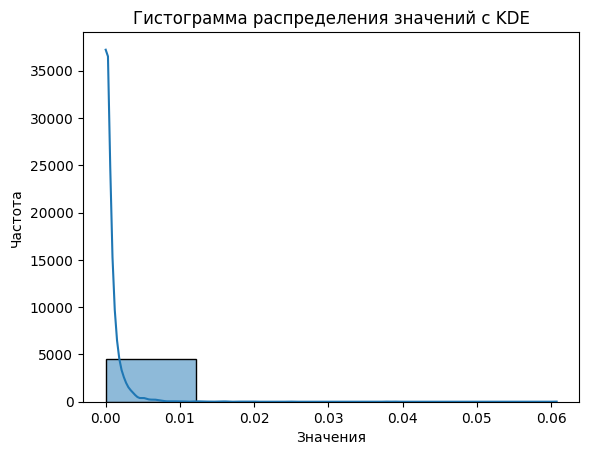

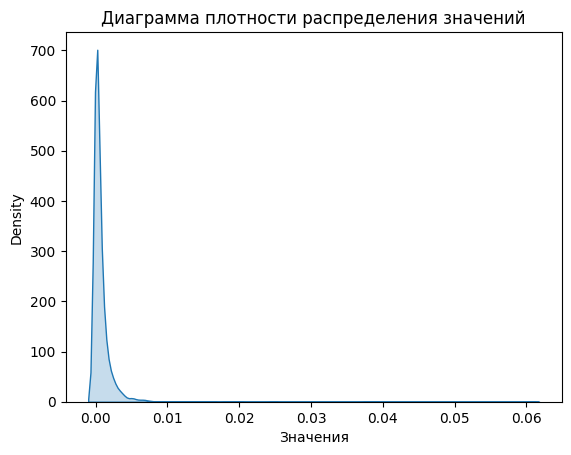

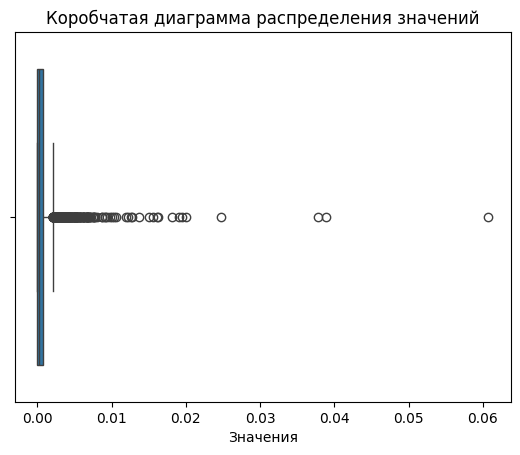

In [ ]:
sns.histplot(data['comms_views'], bins=5, kde=True)
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.title('Гистограмма распределения значений с KDE')
plt.show()

sns.kdeplot(data['comms_views'], shade=True)
plt.xlabel('Значения')
plt.title('Диаграмма плотности распределения значений')
plt.show()

sns.boxplot(x=data['comms_views'])
plt.xlabel('Значения')
plt.title('Коробчатая диаграмма распределения значений')
plt.show()

In [ ]:
Q1 = data['comms_views'].quantile(0.25)
Q3 = data['comms_views'].quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3, IQR)
# Определение границ для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

0.0 0.0008176611190494169 0.0008176611190494169


In [ ]:
data_quantile = data[(data['comms_views'] >= lower_bound) & (data['comms_views'] <= upper_bound)]
data_quantile.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4119 entries, 2 to 5720
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             4119 non-null   datetime64[ns]
 1   name             4119 non-null   object        
 2   text             4119 non-null   object        
 3   views            4119 non-null   int64         
 4   comments         4119 non-null   int64         
 5   forwards         4119 non-null   int64         
 6   emoji            4119 non-null   object        
 7   reactions        4119 non-null   int64         
 8   subscribers      4119 non-null   int64         
 9   comms_views      4119 non-null   float64       
 10  forwards_views   4119 non-null   float64       
 11  reactions_views  4119 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5), object(3)
memory usage: 418.3+ KB


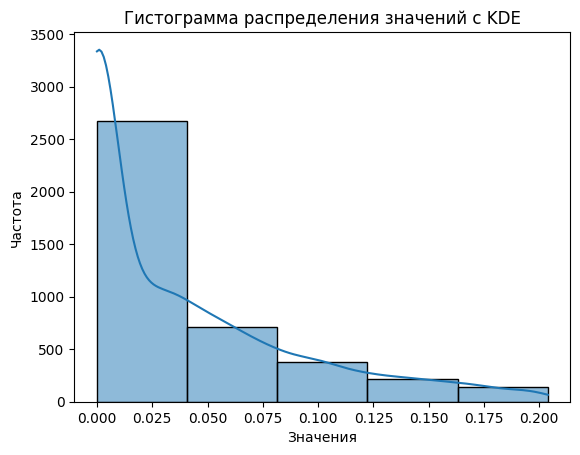

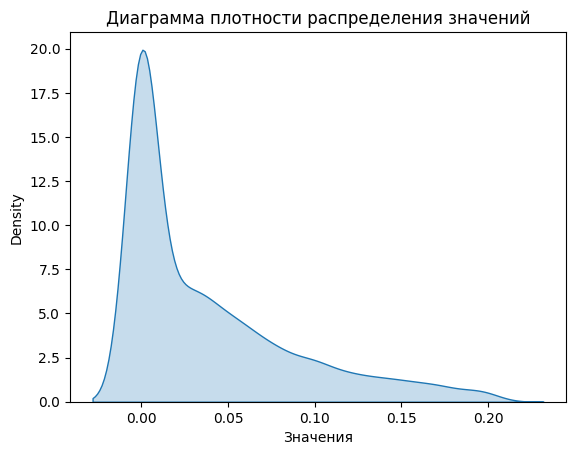

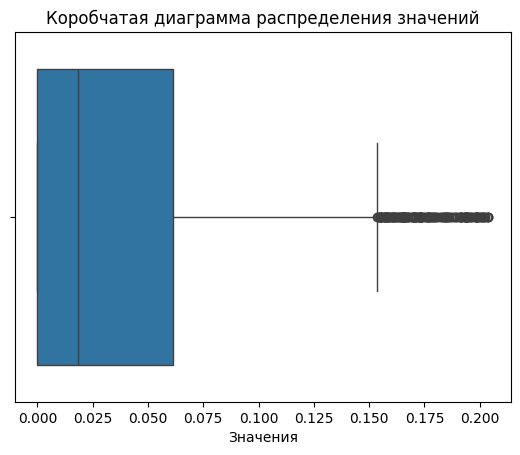

In [ ]:
sns.histplot(data_quantile['comms_views']*100, bins=5, kde=True)
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.title('Гистограмма распределения значений с KDE')
plt.show()

sns.kdeplot(data_quantile['comms_views']*100, shade=True)
plt.xlabel('Значения')
plt.title('Диаграмма плотности распределения значений')
plt.show()

sns.boxplot(x=data_quantile['comms_views']*100)
plt.xlabel('Значения')
plt.title('Коробчатая диаграмма распределения значений')
plt.show()

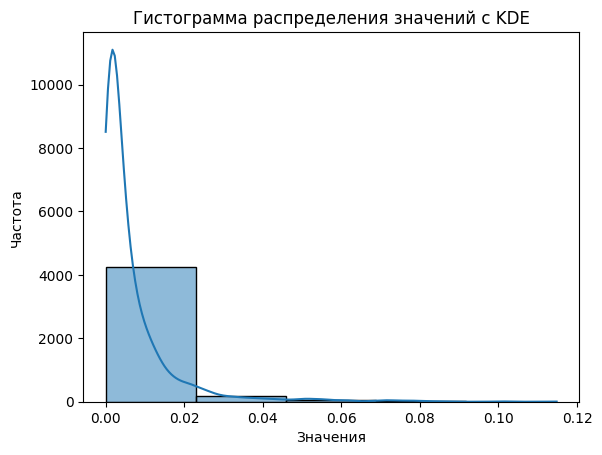

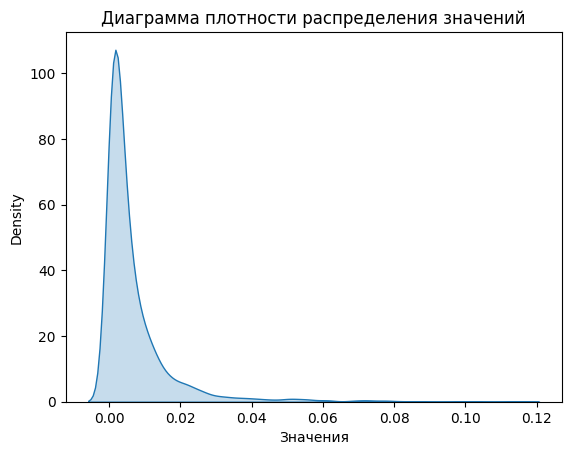

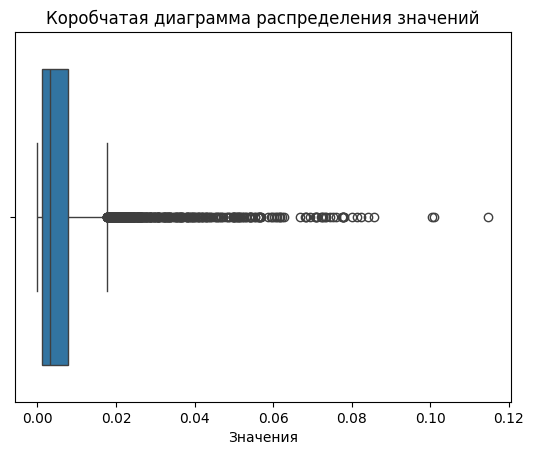

In [ ]:
sns.histplot(data['forwards_views'], bins=5, kde=True)
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.title('Гистограмма распределения значений с KDE')
plt.show()

sns.kdeplot(data['forwards_views'], shade=True)
plt.xlabel('Значения')
plt.title('Диаграмма плотности распределения значений')
plt.show()

sns.boxplot(x=data['forwards_views'])
plt.xlabel('Значения')
plt.title('Коробчатая диаграмма распределения значений')
plt.show()

In [ ]:
Q1 = data['forwards_views'].quantile(0.25)
Q3 = data['forwards_views'].quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3, IQR)
# Определение границ для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_quantile = data[(data['forwards_views'] >= lower_bound) & (data['forwards_views'] <= upper_bound)]
data_quantile.info()

0.0011890394356275345 0.00777244496684225 0.006583405531214716
<class 'pandas.core.frame.DataFrame'>
Index: 4108 entries, 0 to 5720
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             4108 non-null   datetime64[ns]
 1   name             4108 non-null   object        
 2   text             4108 non-null   object        
 3   views            4108 non-null   int64         
 4   comments         4108 non-null   int64         
 5   forwards         4108 non-null   int64         
 6   emoji            4108 non-null   object        
 7   reactions        4108 non-null   int64         
 8   subscribers      4108 non-null   int64         
 9   comms_views      4108 non-null   float64       
 10  forwards_views   4108 non-null   float64       
 11  reactions_views  4108 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5), object(3)
memory usage: 417.2+ KB


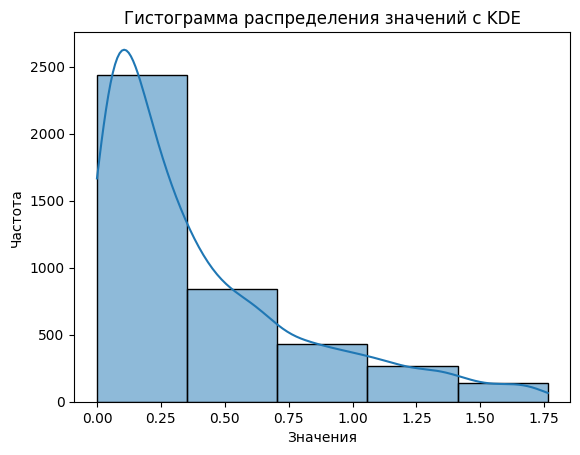

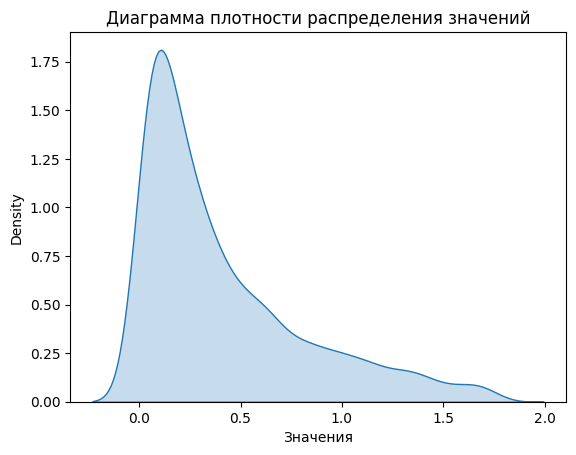

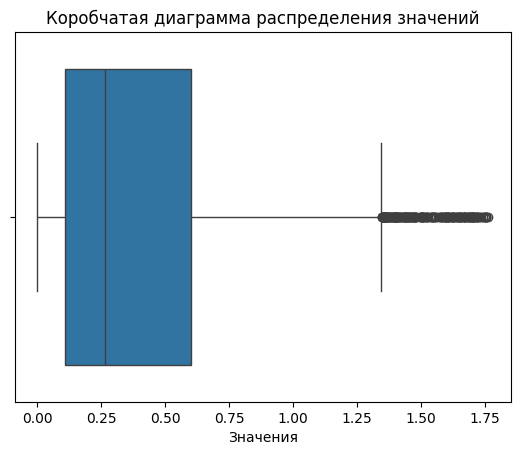

In [ ]:
sns.histplot(data_quantile['forwards_views']*100, bins=5, kde=True)
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.title('Гистограмма распределения значений с KDE')
plt.show()

sns.kdeplot(data_quantile['forwards_views']*100, shade=True)
plt.xlabel('Значения')
plt.title('Диаграмма плотности распределения значений')
plt.show()

sns.boxplot(x=data_quantile['forwards_views']*100)
plt.xlabel('Значения')
plt.title('Коробчатая диаграмма распределения значений')
plt.show()

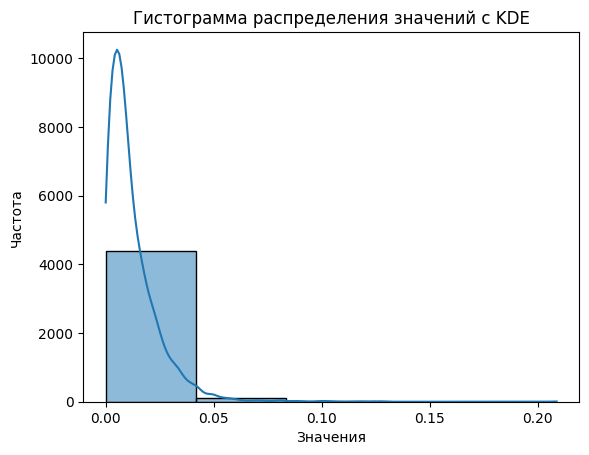

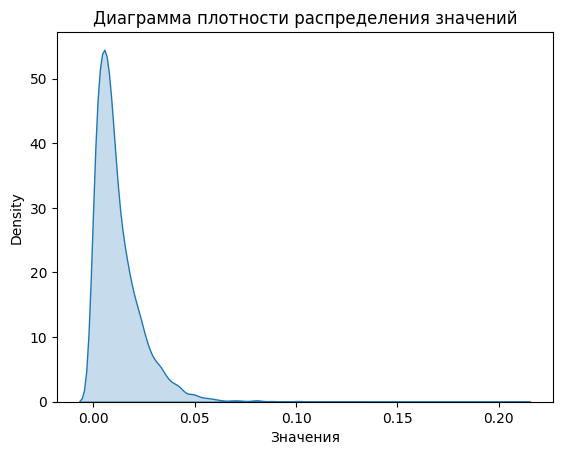

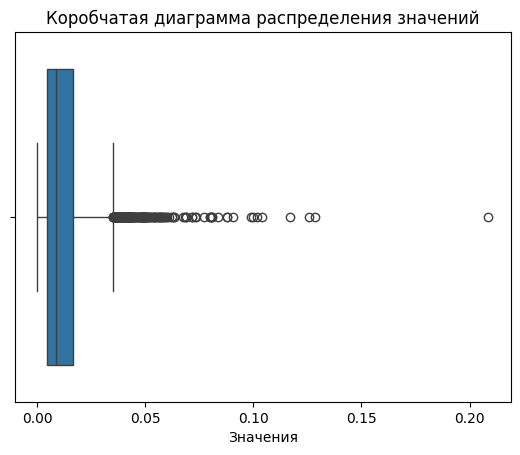

In [ ]:
sns.histplot(data['reactions_views'], bins=5, kde=True)
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.title('Гистограмма распределения значений с KDE')
plt.show()

sns.kdeplot(data['reactions_views'], shade=True)
plt.xlabel('Значения')
plt.title('Диаграмма плотности распределения значений')
plt.show()

sns.boxplot(x=data['reactions_views'])
plt.xlabel('Значения')
plt.title('Коробчатая диаграмма распределения значений')
plt.show()

In [ ]:
Q1 = data['reactions_views'].quantile(0.25)
Q3 = data['reactions_views'].quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3, IQR)
# Определение границ для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_quantile = data[(data['reactions_views'] >= lower_bound) & (data['reactions_views'] <= upper_bound)]
data_quantile.info()

0.004221368690532275 0.016569947953916007 0.012348579263383732
<class 'pandas.core.frame.DataFrame'>
Index: 4298 entries, 0 to 5720
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             4298 non-null   datetime64[ns]
 1   name             4298 non-null   object        
 2   text             4298 non-null   object        
 3   views            4298 non-null   int64         
 4   comments         4298 non-null   int64         
 5   forwards         4298 non-null   int64         
 6   emoji            4298 non-null   object        
 7   reactions        4298 non-null   int64         
 8   subscribers      4298 non-null   int64         
 9   comms_views      4298 non-null   float64       
 10  forwards_views   4298 non-null   float64       
 11  reactions_views  4298 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5), object(3)
memory usage: 436.5+ KB


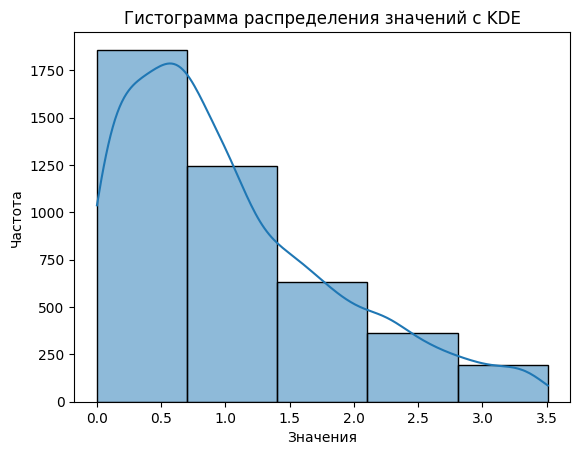

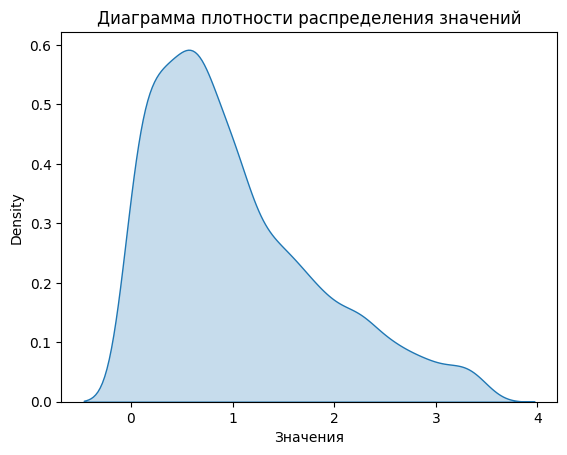

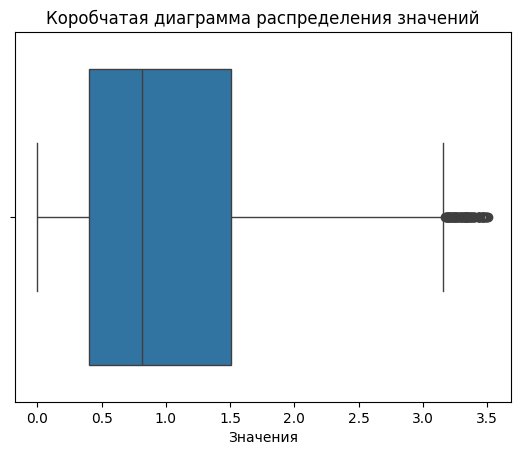

In [ ]:
sns.histplot(data_quantile['reactions_views']*100, bins=5, kde=True)
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.title('Гистограмма распределения значений с KDE')
plt.show()

sns.kdeplot(data_quantile['reactions_views']*100, shade=True)
plt.xlabel('Значения')
plt.title('Диаграмма плотности распределения значений')
plt.show()

sns.boxplot(x=data_quantile['reactions_views']*100)
plt.xlabel('Значения')
plt.title('Коробчатая диаграмма распределения значений')
plt.show()

# Создание метрики


In [ ]:
# Попробовал сделать таргет среднегармонческим,но слишком плохое выходит распределнеие -
# сильно прекошенное
data['harmonic'] = data.apply(lambda row: hmean([row['comms_views'], row['forwards_views'], row['reactions_views']]), axis=1)
data.head()

,date,name,text,views,comments,forwards,emoji,reactions,subscribers,comms_views,forwards_views,reactions_views,harmonic
0,2024-06-27 14:59:34,🏄 Соревновательный Data Science | Kaggle | Чем...,"**👨‍💻**** Апдейт про Kaggle Camp, который вы ж...",755,2,3,"👍: 14, ⚡: 7, ❤‍🔥: 3",24,2672,0.002649,0.003974,0.031788,0.004541
1,2024-06-25 15:33:36,🏄 Соревновательный Data Science | Kaggle | Чем...,👨‍💻 **Контент из сообщества**! \n**\n****🏄****...,877,3,19,"👍: 16, Custom emoji: 7",23,2672,0.003421,0.021665,0.026226,0.007966
2,2024-06-24 12:06:49,🏄 Соревновательный Data Science | Kaggle | Чем...,🏆 [**Запись стрима**](https://youtu.be/kz__54Y...,1075,0,11,"❤‍🔥: 10, Custom emoji: 2",12,2672,0.000000,0.010233,0.011163,0.000000
3,2024-06-21 14:10:38,🏄 Соревновательный Data Science | Kaggle | Чем...,Стрим случился! Всех причастных рады были увид...,1348,9,2,❤‍🔥: 4,4,2672,0.006677,0.001484,0.002967,0.002584
4,2024-06-21 12:45:52,🏄 Соревновательный Data Science | Kaggle | Чем...,"Привет, работяги! 👨‍💻\nКак неделя прошла? Есть...",1348,4,2,❤‍🔥: 10,10,2672,0.002967,0.001484,0.007418,0.002618


In [ ]:
# Поэтому пока что будем брать среднее конверсии (пока работаю над учетом смайлов)
data['mean'] = data[['comms_views', 'forwards_views', 'reactions_views']].mean(axis=1)
data.head()

,date,name,text,views,comments,forwards,emoji,reactions,subscribers,comms_views,forwards_views,reactions_views,harmonic,mean
0,2024-06-27 14:59:34,🏄 Соревновательный Data Science | Kaggle | Чем...,"**👨‍💻**** Апдейт про Kaggle Camp, который вы ж...",755,2,3,"👍: 14, ⚡: 7, ❤‍🔥: 3",24,2672,0.002649,0.003974,0.031788,0.004541,0.012804
1,2024-06-25 15:33:36,🏄 Соревновательный Data Science | Kaggle | Чем...,👨‍💻 **Контент из сообщества**! \n**\n****🏄****...,877,3,19,"👍: 16, Custom emoji: 7",23,2672,0.003421,0.021665,0.026226,0.007966,0.017104
2,2024-06-24 12:06:49,🏄 Соревновательный Data Science | Kaggle | Чем...,🏆 [**Запись стрима**](https://youtu.be/kz__54Y...,1075,0,11,"❤‍🔥: 10, Custom emoji: 2",12,2672,0.000000,0.010233,0.011163,0.000000,0.007132
3,2024-06-21 14:10:38,🏄 Соревновательный Data Science | Kaggle | Чем...,Стрим случился! Всех причастных рады были увид...,1348,9,2,❤‍🔥: 4,4,2672,0.006677,0.001484,0.002967,0.002584,0.003709
4,2024-06-21 12:45:52,🏄 Соревновательный Data Science | Kaggle | Чем...,"Привет, работяги! 👨‍💻\nКак неделя прошла? Есть...",1348,4,2,❤‍🔥: 10,10,2672,0.002967,0.001484,0.007418,0.002618,0.003956


## Сохранение c основными метриками


In [ ]:
data.to_csv('data_with_harmonic_mean.csv', index=False)

# Манипуляции с таргетом

In [ ]:
data = pd.read_csv('data_with_harmonic_mean.csv', sep = ',', parse_dates=['date'], encoding = 'utf-8')
data.head()

,date,name,text,views,comments,forwards,emoji,reactions,subscribers,comms_views,forwards_views,reactions_views,harmonic,mean
0,2024-06-27 14:59:34,🏄 Соревновательный Data Science | Kaggle | Чем...,"**👨‍💻**** Апдейт про Kaggle Camp, который вы ж...",755,2,3,"👍: 14, ⚡: 7, ❤‍🔥: 3",24,2672,0.002649,0.003974,0.031788,0.004541,0.012804
1,2024-06-25 15:33:36,🏄 Соревновательный Data Science | Kaggle | Чем...,👨‍💻 **Контент из сообщества**! \n**\n****🏄****...,877,3,19,"👍: 16, Custom emoji: 7",23,2672,0.003421,0.021665,0.026226,0.007966,0.017104
2,2024-06-24 12:06:49,🏄 Соревновательный Data Science | Kaggle | Чем...,🏆 [**Запись стрима**](https://youtu.be/kz__54Y...,1075,0,11,"❤‍🔥: 10, Custom emoji: 2",12,2672,0.000000,0.010233,0.011163,0.000000,0.007132
3,2024-06-21 14:10:38,🏄 Соревновательный Data Science | Kaggle | Чем...,Стрим случился! Всех причастных рады были увид...,1348,9,2,❤‍🔥: 4,4,2672,0.006677,0.001484,0.002967,0.002584,0.003709
4,2024-06-21 12:45:52,🏄 Соревновательный Data Science | Kaggle | Чем...,"Привет, работяги! 👨‍💻\nКак неделя прошла? Есть...",1348,4,2,❤‍🔥: 10,10,2672,0.002967,0.001484,0.007418,0.002618,0.003956


In [ ]:
"""

Здесь я тестирую возможности преобразования таргета и
просматриваю его реализацию.
В итоге пришел к тому, что использую среднее значение конверсии,логарифмирую
его и потом делаю преобразование Бокса-Кокса.
Получил плюс минус равномернораспределенный таргет и преобразовал его в классы,
перейдя от дискретного распределения с регрессией к классификации трех классов:
Низкий интерес, средний и высокий.
На практике видно, что у нас будет дисбаланс классов,
потому что обычных постов подавляющее большинство, однако сам выбор разделения
классов мне показался логичным - в жизни и правда мне так кажется и при ручном
просмотре по субьективному мнению очень похожу на правду. В этом моменте может
надо будет еще подумать что делать, но пока так.

"""

In [ ]:
data['harmonic'] = data['harmonic']*100
data['mean'] = data['mean']*100

data.drop(columns=['reactions', 'comments', 'views', 'reactions_views', 'comms_views', 'forwards_views', 'forwards'], inplace=True)
data.head()


,date,name,text,emoji,subscribers,harmonic,mean
0,2024-06-27 14:59:34,🏄 Соревновательный Data Science | Kaggle | Чем...,"**👨‍💻**** Апдейт про Kaggle Camp, который вы ж...","👍: 14, ⚡: 7, ❤‍🔥: 3",2672,0.454115,1.280353
1,2024-06-25 15:33:36,🏄 Соревновательный Data Science | Kaggle | Чем...,👨‍💻 **Контент из сообщества**! \n**\n****🏄****...,"👍: 16, Custom emoji: 7",2672,0.796555,1.710376
2,2024-06-24 12:06:49,🏄 Соревновательный Data Science | Kaggle | Чем...,🏆 [**Запись стрима**](https://youtu.be/kz__54Y...,"❤‍🔥: 10, Custom emoji: 2",2672,0.000000,0.713178
3,2024-06-21 14:10:38,🏄 Соревновательный Data Science | Kaggle | Чем...,Стрим случился! Всех причастных рады были увид...,❤‍🔥: 4,2672,0.258447,0.370920
4,2024-06-21 12:45:52,🏄 Соревновательный Data Science | Kaggle | Чем...,"Привет, работяги! 👨‍💻\nКак неделя прошла? Есть...",❤‍🔥: 10,2672,0.261826,0.395648


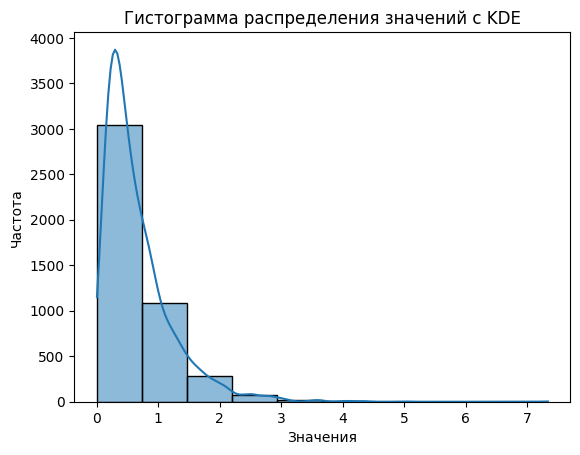

In [ ]:
sns.histplot(data['mean'], bins=10, kde=True)
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.title('Гистограмма распределения значений с KDE')
plt.show()

In [ ]:
Q1 = data['mean'].quantile(0.25)
Q3 = data['mean'].quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3, IQR)
# Определение границ для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_quantile = data[(data['mean'] >= lower_bound) & (data['mean'] <= upper_bound)]
data_quantile.info()

0.27186953972032746 0.8675312800446375 0.5956617403243101
<class 'pandas.core.frame.DataFrame'>
Index: 4288 entries, 0 to 4507
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         4288 non-null   datetime64[ns]
 1   name         4288 non-null   object        
 2   text         4288 non-null   object        
 3   emoji        4288 non-null   object        
 4   subscribers  4288 non-null   int64         
 5   harmonic     4288 non-null   float64       
 6   mean         4288 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 268.0+ KB


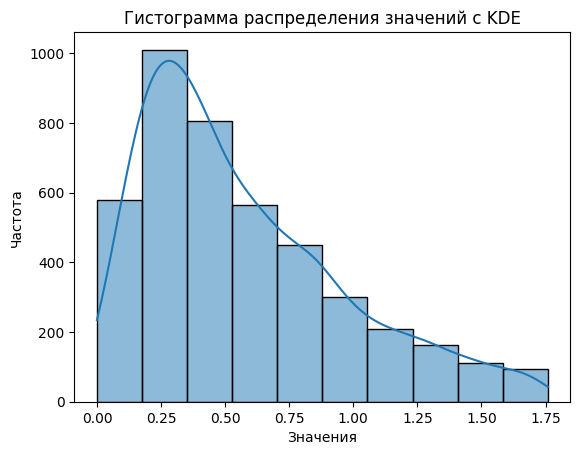

In [ ]:
sns.histplot(data_quantile['mean'], bins=10, kde=True)
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.title('Гистограмма распределения значений с KDE')
plt.show()


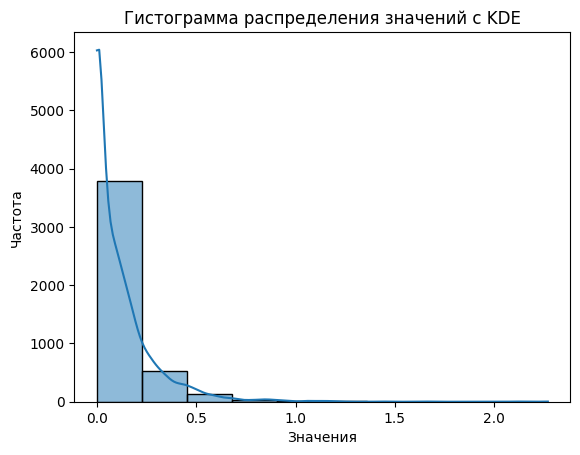

In [ ]:
sns.histplot(data['harmonic'], bins=10, kde=True)
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.title('Гистограмма распределения значений с KDE')
plt.show()


In [ ]:
Q1 = data['harmonic'].quantile(0.25)
Q3 = data['harmonic'].quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3, IQR)
# Определение границ для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_quantile = data[(data['harmonic'] >= lower_bound) & (data['harmonic'] <= upper_bound)]
data_quantile.info()

0.0 0.15904030515400253 0.15904030515400253
<class 'pandas.core.frame.DataFrame'>
Index: 4233 entries, 2 to 4507
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         4233 non-null   datetime64[ns]
 1   name         4233 non-null   object        
 2   text         4233 non-null   object        
 3   emoji        4233 non-null   object        
 4   subscribers  4233 non-null   int64         
 5   harmonic     4233 non-null   float64       
 6   mean         4233 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 264.6+ KB


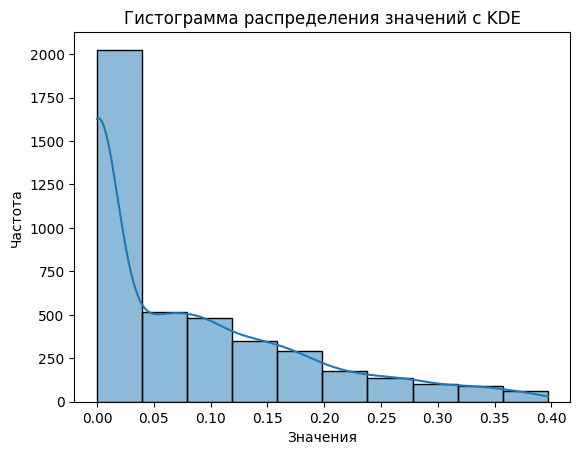

In [ ]:
sns.histplot(data_quantile['harmonic'], bins=10, kde=True)
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.title('Гистограмма распределения значений с KDE')
plt.show()


In [ ]:
data.describe()

,date,subscribers,harmonic,mean
count,4508,4.508000e+03,4508.000000,4508.000000
mean,2024-01-25 09:11:31.106477312,2.385210e+05,0.111972,0.655481
min,2022-03-12 16:38:09,2.672000e+03,0.000000,0.000000
25%,2023-12-11 10:53:02.500000,1.776000e+04,0.000000,0.271870
50%,2024-04-06 16:30:06,5.058700e+04,0.057396,0.493879
75%,2024-06-03 13:16:18,1.087150e+05,0.159040,0.867531
max,2024-07-01 11:52:01,1.488182e+06,2.270247,7.340608
std,NaN,4.760781e+05,0.165911,0.561525


In [ ]:
def add_epsilon_to_zero(series, epsilon=1e-10):
    """
    Добавляет малое значение epsilon к нулевым элементам дял логарифмирования.
    """
    return series.apply(lambda x: x + epsilon if x == 0 else x)


In [ ]:
data['target1'] = add_epsilon_to_zero(data['mean'])
data['target2'] = add_epsilon_to_zero(data['harmonic'])


In [ ]:
data['target1'] = np.log1p(data['target1'])
data['target2'] = np.log1p(data['target2'])

data.describe()

,date,subscribers,harmonic,mean,target1,target2
count,4508,4.508000e+03,4508.000000,4508.000000,4.508000e+03,4.508000e+03
mean,2024-01-25 09:11:31.106477312,2.385210e+05,0.111972,0.655481,4.586111e-01,9.712226e-02
min,2022-03-12 16:38:09,2.672000e+03,0.000000,0.000000,1.000000e-10,1.000000e-10
25%,2023-12-11 10:53:02.500000,1.776000e+04,0.000000,0.271870,2.404879e-01,1.000000e-10
50%,2024-04-06 16:30:06,5.058700e+04,0.057396,0.493879,4.013763e-01,5.580906e-02
75%,2024-06-03 13:16:18,1.087150e+05,0.159040,0.867531,6.246174e-01,1.475923e-01
max,2024-07-01 11:52:01,1.488182e+06,2.270247,7.340608,2.121136e+00,1.184866e+00
std,NaN,4.760781e+05,0.165911,0.561525,2.881567e-01,1.281797e-01


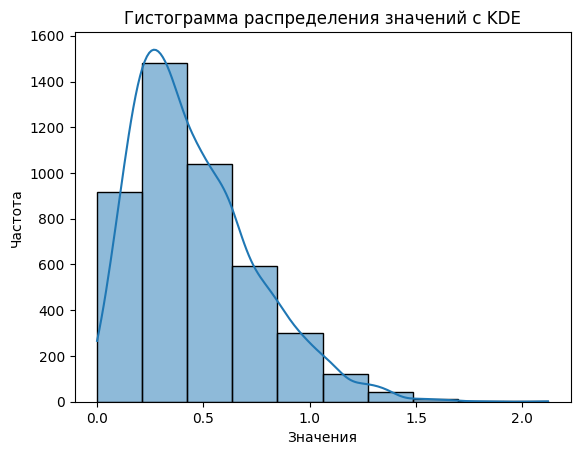

In [ ]:
sns.histplot(data['target1'], bins=10, kde=True)
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.title('Гистограмма распределения значений с KDE')
plt.show()


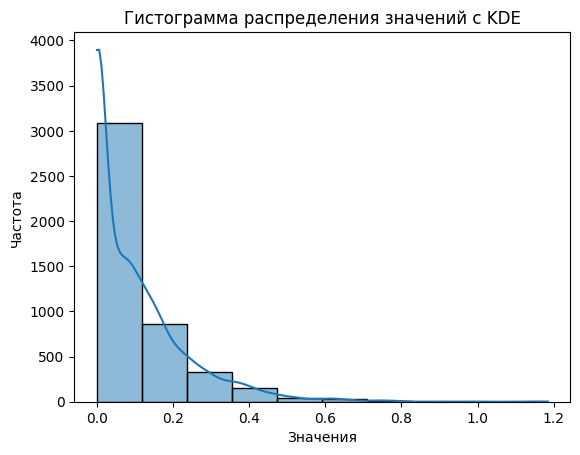

In [ ]:
sns.histplot(data['target2'], bins=10, kde=True)
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.title('Гистограмма распределения значений с KDE')
plt.show()

In [ ]:
data['target11'], _ = boxcox(data['target1'])
data['target22'], _ = boxcox(data['target2'])
data.describe()

,date,subscribers,harmonic,mean,target1,target2,target11,target22
count,4508,4.508000e+03,4508.000000,4508.000000,4.508000e+03,4.508000e+03,4508.000000,4508.000000
mean,2024-01-25 09:11:31.106477312,2.385210e+05,0.111972,0.655481,4.586111e-01,9.712226e-02,-0.756806,-6.322148
min,2022-03-12 16:38:09,2.672000e+03,0.000000,0.000000,1.000000e-10,1.000000e-10,-2.378227,-12.886337
25%,2023-12-11 10:53:02.500000,1.776000e+04,0.000000,0.271870,2.404879e-01,1.000000e-10,-1.072030,-12.886337
50%,2024-04-06 16:30:06,5.058700e+04,0.057396,0.493879,4.013763e-01,5.580906e-02,-0.758089,-2.663033
75%,2024-06-03 13:16:18,1.087150e+05,0.159040,0.867531,6.246174e-01,1.475923e-01,-0.426980,-1.813603
max,2024-07-01 11:52:01,1.488182e+06,2.270247,7.340608,2.121136e+00,1.184866e+00,0.884405,0.170444
std,NaN,4.760781e+05,0.165911,0.561525,2.881567e-01,1.281797e-01,0.478920,5.363889


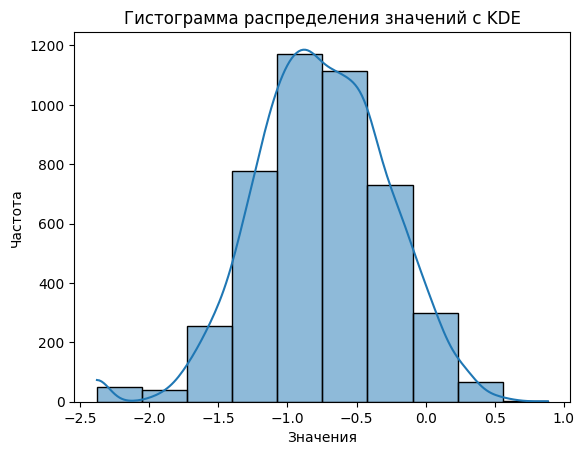

In [ ]:
sns.histplot(data['target11'], bins=10, kde=True)
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.title('Гистограмма распределения значений с KDE')
plt.show()

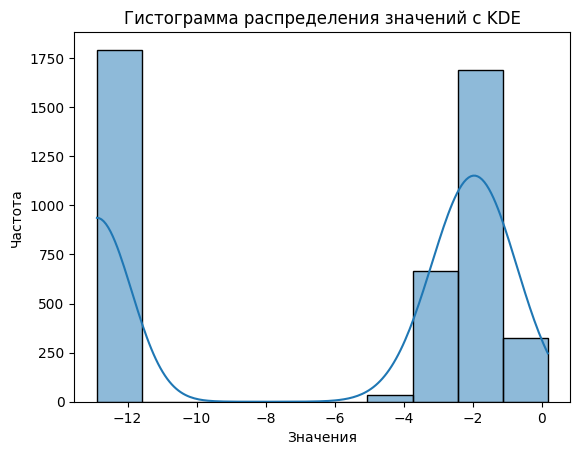

In [ ]:
sns.histplot(data['target22'], bins=10, kde=True)
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.title('Гистограмма распределения значений с KDE')
plt.show()

Окончательно перешли к таргету по среднему значению

In [ ]:
# Выбирал вручную
thresholds = data['target11'].quantile([0.15, 0.66]).values
thresholds

array([-1.22725004, -0.54660965])

In [ ]:
def classify(value):
    if value <= thresholds[0]:
        return 'низкий'
    elif value <= thresholds[1]:
        return 'средний'
    else:
        return 'высокий'

data['class'] = data['target11'].apply(classify)
data.head()

,date,name,text,emoji,subscribers,harmonic,mean,target1,target2,target11,target22,class
0,2024-06-27 14:59:34,🏄 Соревновательный Data Science | Kaggle | Чем...,"**👨‍💻**** Апдейт про Kaggle Camp, который вы ж...","👍: 14, ⚡: 7, ❤‍🔥: 3",2672,0.454115,1.280353,0.824330,3.743978e-01,-0.185546,-0.955692,высокий
1,2024-06-25 15:33:36,🏄 Соревновательный Data Science | Kaggle | Чем...,👨‍💻 **Контент из сообщества**! \n**\n****🏄****...,"👍: 16, Custom emoji: 7",2672,0.796555,1.710376,0.997087,5.858711e-01,-0.002915,-0.526668,высокий
2,2024-06-24 12:06:49,🏄 Соревновательный Data Science | Kaggle | Чем...,🏆 [**Запись стрима**](https://youtu.be/kz__54Y...,"❤‍🔥: 10, Custom emoji: 2",2672,0.000000,0.713178,0.538350,1.000000e-10,-0.545195,-12.886337,высокий
3,2024-06-21 14:10:38,🏄 Соревновательный Data Science | Kaggle | Чем...,Стрим случился! Всех причастных рады были увид...,❤‍🔥: 4,2672,0.258447,0.370920,0.315482,2.298787e-01,-0.914104,-1.410851,средний
4,2024-06-21 12:45:52,🏄 Соревновательный Data Science | Kaggle | Чем...,"Привет, работяги! 👨‍💻\nКак неделя прошла? Есть...",❤‍🔥: 10,2672,0.261826,0.395648,0.333359,2.325597e-01,-0.879774,-1.400176,средний


In [ ]:
data.drop(columns=['subscribers', 'harmonic', 'mean', 'target1', 'target2', 'target11', 'target22'], inplace=True)
data.head()

,date,name,text,emoji,class
0,2024-06-27 14:59:34,🏄 Соревновательный Data Science | Kaggle | Чем...,"**👨‍💻**** Апдейт про Kaggle Camp, который вы ж...","👍: 14, ⚡: 7, ❤‍🔥: 3",высокий
1,2024-06-25 15:33:36,🏄 Соревновательный Data Science | Kaggle | Чем...,👨‍💻 **Контент из сообщества**! \n**\n****🏄****...,"👍: 16, Custom emoji: 7",высокий
2,2024-06-24 12:06:49,🏄 Соревновательный Data Science | Kaggle | Чем...,🏆 [**Запись стрима**](https://youtu.be/kz__54Y...,"❤‍🔥: 10, Custom emoji: 2",высокий
3,2024-06-21 14:10:38,🏄 Соревновательный Data Science | Kaggle | Чем...,Стрим случился! Всех причастных рады были увид...,❤‍🔥: 4,средний
4,2024-06-21 12:45:52,🏄 Соревновательный Data Science | Kaggle | Чем...,"Привет, работяги! 👨‍💻\nКак неделя прошла? Есть...",❤‍🔥: 10,средний


In [ ]:
data[(data['name']=='BetBoom Esports Dota 2') & (data['class']=='низкий')].head()

,date,name,text,emoji,class
3559,2024-06-29 12:25:38,BetBoom Esports Dota 2,Обсуждаешь в чатиках с корешами **__Riyadh Mas...,"❤: 25, Custom emoji: 9, 🔥: 5, 👍: 4, 😁: 3, 💩: 2",низкий
3567,2024-06-27 12:40:06,BetBoom Esports Dota 2,🎉 Результаты розыгрыша:\n\nПобедители:\n1. ком...,"❤: 23, 👎: 9, 😁: 6, 💩: 6, 😭: 5, 🎉: 2, 🌚: 2, 👌: ...",низкий
3570,2024-06-26 16:01:25,BetBoom Esports Dota 2,Завтра утром Солыч и Сатаник снова сцепятся на...,"❤: 86, 👍: 11, 🤣: 8, 😁: 6, 🔥: 5, 🥰: 1, 💩: 1",низкий
3593,2024-06-21 09:22:52,BetBoom Esports Dota 2,"Прости, верхняя сетка, сердечко админа с этими...","🔥: 109, 😁: 25, ❤: 13, Custom emoji: 3, 👍: 2, 🤣: 2",низкий
3600,2024-06-19 08:49:24,BetBoom Esports Dota 2,Каждые квалы — лишний повод для админа открыть...,"🤣: 111, ❤: 13, 👍: 11, 🔥: 2, 👨‍💻: 2, 🤡: 1",низкий


In [ ]:
data[(data['name']=='BetBoom Esports Dota 2') & (data['class']=='высокий')].head()

,date,name,text,emoji,class
3552,2024-07-01 09:13:32,BetBoom Esports Dota 2,Абузы мипарей ~~заруинили админу винстрик~~ мы...,"🔥: 1326, ❤: 1166, 😎: 104, 👍: 98, 🐳: 47, ❤‍🔥: 5...",высокий
3553,2024-06-30 18:08:54,BetBoom Esports Dota 2,EZ турик для мужиков из Team Spirit 😎 Если бы ...,"🔥: 289, ❤: 48, 👍: 28, 😁: 12, 🤣: 6, 🏆: 6, 🍾: 4,...",высокий
3560,2024-06-29 07:35:32,BetBoom Esports Dota 2,"Дота aнонсировала дату выхода 3 акта, респект ...","🤣: 368, 🔥: 24, ❤: 14, 👍: 6, 🍾: 4, ❤‍🔥: 3, 👏: 3...",высокий
3565,2024-06-27 16:36:24,BetBoom Esports Dota 2,🔙 **__Р О В Н О Г О Д Н А З А Д __** \n\...,"🤣: 456, 👏: 24, 😢: 16, 👍: 12, ❤: 7, 😁: 4, 🔥: 3,...",высокий
3571,2024-06-26 12:40:08,BetBoom Esports Dota 2,**__BBounty-руна__** **__заспавнилась__** 🔥\n\...,"❤: 747, 👍: 16, Custom emoji: 11, ❤‍🔥: 8, 😁: 5,...",высокий


## Сохранение с классами

In [ ]:
data.to_csv('data_with_class.csv', index=False)

In [ ]:
data = pd.read_csv('data_with_class.csv', sep = ',', parse_dates=['date'], encoding = 'utf-8')
data.head()

,date,name,text,emoji,class
0,2024-06-27 14:59:34,🏄 Соревновательный Data Science | Kaggle | Чем...,"**👨‍💻**** Апдейт про Kaggle Camp, который вы ж...","👍: 14, ⚡: 7, ❤‍🔥: 3",высокий
1,2024-06-25 15:33:36,🏄 Соревновательный Data Science | Kaggle | Чем...,👨‍💻 **Контент из сообщества**! \n**\n****🏄****...,"👍: 16, Custom emoji: 7",высокий
2,2024-06-24 12:06:49,🏄 Соревновательный Data Science | Kaggle | Чем...,🏆 [**Запись стрима**](https://youtu.be/kz__54Y...,"❤‍🔥: 10, Custom emoji: 2",высокий
3,2024-06-21 14:10:38,🏄 Соревновательный Data Science | Kaggle | Чем...,Стрим случился! Всех причастных рады были увид...,❤‍🔥: 4,средний
4,2024-06-21 12:45:52,🏄 Соревновательный Data Science | Kaggle | Чем...,"Привет, работяги! 👨‍💻\nКак неделя прошла? Есть...",❤‍🔥: 10,средний


# Clean text



In [ ]:
class Cleaner:
    """
    Класс Cleaner предназначен для предварительной обработки текста
    перед его анализом. Он включает в себя функции для удаления HTML-тегов,
    URL, специальных символов, преобразования чисел и эмоджи в слова,
    удаления стоп-слов и знаков препинания, а также лемматизации.

    Methods:
        clean_text(self, input_text): Очищает входной текст от различных
        нежелательных элементов и приводит его к стандартному виду.

        emojis_words(self, text): Преобразует эмоджи в слова, используя их
         текстовое описание.

    Example:
        cleaner = Cleaner()
        raw_text = "Some raw text with HTML <html>...</html>,
                    URLs http://example.com, and emojis 😊."
        clean_text = cleaner.clean_text(raw_text)
        print(clean_text)
    """

    def __init__(self):
        """
        Инициализирует экземпляр класса Cleaner,
        загружая необходимые ресурсы для лемматизации и токенизации.
        """

        self.model_lemmatizer = pymorphy2.MorphAnalyzer()
        self.nlp = spacy.load("ru_core_news_sm")

    # Функция для очистки текста
    def clean_text(self, input_text):
        """
        Очищает входной текст от HTML-тегов, URL, эмоджи, специальных символов,
        преобразует числа в слова, удаляет стоп-слова и знаки препинания,
        и проводит лемматизацию.

        Params:
            input_text (str): Входной текст для очистки.

        Exit:
            str: Очищенный текст.
        """

        # HTML-теги: первый шаг - удалить из входного текста все HTML-теги
        clean_text = re.sub('<[^<]+?>', '', input_text)

        # URL и ссылки: далее - удаляем из текста все URL и ссылки
        clean_text = re.sub(r'http\S+', '', clean_text)

        # Эмоджи и эмотиконы: используем собственную функцию для преобразования эмоджи в текст
        # Важно понимать эмоциональную окраску обрабатываемого текста
        clean_text = self.emojis_words(clean_text)

        # Приводим все входные данные к нижнему регистру
        clean_text = clean_text.lower()

        # Убираем все пробелы
        # Так как все данные теперь представлены словами - удалим пробелы
        clean_text = re.sub('\s+', ' ', clean_text)

        # Убираем специальные символы: избавляемся от всего, что не является "словами"
        clean_text = re.sub('[^A-Za-zА-Яа-я0-9\s]', '', clean_text)

        # Записываем числа прописью: 100 превращается в "сто" (для компьютера)
        clean_text = self.replace_numbers_with_words(clean_text)

        # Стоп-слова: удаление стоп-слов - это стандартная практика очистки текстов
        # Лемматизируем каждое слово
        stop_words_ru = set(stopwords.words('russian'))
        stop_words_en = set(ENGLISH_STOP_WORDS)
        all_stop_words = stop_words_en.union(stop_words_ru)
        tokens = self.nlp(clean_text)
        tokens = [token.lemma_ for token in tokens if token not in all_stop_words]
        clean_text = ' '.join(tokens)

        # Знаки препинания: далее - удаляем из текста все знаки препинания
        clean_text = re.sub(r'[^\w\s]', '', clean_text)

        # clean_text = ' '.join([self.model_lemmatizer.parse(word)[0].normal_form for word in clean_text.split()])

        # И наконец - возвращаем очищенный текст
        return clean_text

    # Функция для преобразования чисел в слова
    def replace_numbers_with_words(self, text):
        """
        Преобразует числа в тексте в их словесные эквиваленты.

        Params:
            text (str): Текст для преобразования чисел.

        Exit:
            str: Текст с преобразованными числами.
        """
        # Паттерн для нахождения чисел
        number_pattern = r'\b\d+\b'

        # Нахождение эквивалента числу в словесной форме с помощью модуля num2words
        def replace(match):
            number = int(match.group(0))

            return num2words(number, lang='ru')

        return re.sub(number_pattern, replace, text)

    # Функция для преобразования эмоджи в слова
    def emojis_words(self, text):
        """
        Преобразует эмоджи в тексте в их словесные описания.

        Params:
            text (str): Текст для преобразования эмоджи.

        Exit:
            str: Текст с преобразованными эмоджи.
        """
        # Модуль emoji: преобразование эмоджи в их словесные описания
        clean_text = emoji.demojize(text, delimiters=(" ", " "))

        # Редактирование текста путём замены ":" и" _", а так же - путём добавления пробела между отдельными словами
        clean_text = clean_text.replace(":", "").replace("_", " ")

        return clean_text

In [ ]:
cleaner = Cleaner()
data['ctext'] = data['text'].apply(cleaner.clean_text)

In [ ]:
data[['ctext','text']]

,ctext,text
0,man technologist апдейт про kaggle camp которы...,"**👨‍💻**** Апдейт про Kaggle Camp, который вы ж..."
1,man technologist контент из сообщество person ...,👨‍💻 **Контент из сообщества**! \n**\n****🏄****...
2,trophy запись стрим от двадцать один июнь гост...,🏆 [**Запись стрима**](https://youtu.be/kz__54Y...
3,стрим случиться весь причастный рада быть увид...,Стрим случился! Всех причастных рады были увид...
4,привет работяга man technologist как неделя пр...,"Привет, работяги! 👨‍💻\nКак неделя прошла? Есть..."
...,...,...
4503,инст жать red heart люкан если тоже считать чт...,"Инста жми ❤️ Люкана, если тоже считаешь, что п..."
4504,пуджа от ваня пл от егор шторм от дань проход ...,"Пудж от Вани, ПЛ от Егора, Шторм от Дани = про..."
4505,pure настолько на фокус что по кд хукнуть вита...,"Pure~ настолько на фокусе, что по кд хукнул Ви..."
4506,у этот город инта быть новый герой чемпион prince,У этого ~~города~~ Инта будет новый ~~герой~~ ...


## Сохранение очищенного текста

In [ ]:
data.to_csv('data_ctext.csv', index=False)

# Text (topic modeling)


In [ ]:
data = pd.read_csv('data_ctext.csv', sep = ',', parse_dates=['date'], encoding = 'utf-8')
data.head()

,date,name,text,emoji,class,ctext
0,2024-06-27 14:59:34,🏄 Соревновательный Data Science | Kaggle | Чем...,"**👨‍💻**** Апдейт про Kaggle Camp, который вы ж...","👍: 14, ⚡: 7, ❤‍🔥: 3",высокий,man technologist апдейт про kaggle camp которы...
1,2024-06-25 15:33:36,🏄 Соревновательный Data Science | Kaggle | Чем...,👨‍💻 **Контент из сообщества**! \n**\n****🏄****...,"👍: 16, Custom emoji: 7",высокий,man technologist контент из сообщество person ...
2,2024-06-24 12:06:49,🏄 Соревновательный Data Science | Kaggle | Чем...,🏆 [**Запись стрима**](https://youtu.be/kz__54Y...,"❤‍🔥: 10, Custom emoji: 2",высокий,trophy запись стрим от двадцать один июнь гост...
3,2024-06-21 14:10:38,🏄 Соревновательный Data Science | Kaggle | Чем...,Стрим случился! Всех причастных рады были увид...,❤‍🔥: 4,средний,стрим случиться весь причастный рада быть увид...
4,2024-06-21 12:45:52,🏄 Соревновательный Data Science | Kaggle | Чем...,"Привет, работяги! 👨‍💻\nКак неделя прошла? Есть...",❤‍🔥: 10,средний,привет работяга man technologist как неделя пр...


In [ ]:
vectorizer_model = CountVectorizer()
topic_model = BERTopic(vectorizer_model=vectorizer_model, language="multilingual")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4508 entries, 0 to 4507
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4508 non-null   datetime64[ns]
 1   name    4508 non-null   object        
 2   text    4508 non-null   object        
 3   emoji   4508 non-null   object        
 4   class   4508 non-null   object        
 5   ctext   4505 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 211.4+ KB


In [ ]:
data[data['ctext'].isna()]

,date,name,text,emoji,class,ctext
1117,2023-09-07 08:41:03,Machine learning Interview,https://usd-msads.github.io/interviews.pdf,"🔥: 11, 👍: 5, ❤: 3",высокий,NaN
3692,2024-05-26 13:13:47,BetBoom Esports Dota 2,(((,"🫡: 348, 😢: 73, 🤡: 58, 👍: 14, 😁: 12, 🖕: 11, 💔: ...",средний,NaN
3869,2024-04-14 20:41:23,BetBoom Esports Dota 2,))),"🤣: 725, 😁: 88, 🔥: 61, ❤: 42, 🏆: 24, 👍: 21, Cus...",средний,NaN


In [ ]:
data = data.dropna(subset='ctext')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4505 entries, 0 to 4507
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4505 non-null   datetime64[ns]
 1   name    4505 non-null   object        
 2   text    4505 non-null   object        
 3   emoji   4505 non-null   object        
 4   class   4505 non-null   object        
 5   ctext   4505 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 246.4+ KB


In [ ]:
topics, probs = topic_model.fit_transform(data['ctext'])

In [ ]:
topic_model.visualize_topics()

In [ ]:
data['topic'] = topics
data.head()

,date,name,text,emoji,class,ctext,topic
0,2024-06-27 14:59:34,🏄 Соревновательный Data Science | Kaggle | Чем...,"**👨‍💻**** Апдейт про Kaggle Camp, который вы ж...","👍: 14, ⚡: 7, ❤‍🔥: 3",высокий,man technologist апдейт про kaggle camp которы...,2
1,2024-06-25 15:33:36,🏄 Соревновательный Data Science | Kaggle | Чем...,👨‍💻 **Контент из сообщества**! \n**\n****🏄****...,"👍: 16, Custom emoji: 7",высокий,man technologist контент из сообщество person ...,-1
2,2024-06-24 12:06:49,🏄 Соревновательный Data Science | Kaggle | Чем...,🏆 [**Запись стрима**](https://youtu.be/kz__54Y...,"❤‍🔥: 10, Custom emoji: 2",высокий,trophy запись стрим от двадцать один июнь гост...,2
3,2024-06-21 14:10:38,🏄 Соревновательный Data Science | Kaggle | Чем...,Стрим случился! Всех причастных рады были увид...,❤‍🔥: 4,средний,стрим случиться весь причастный рада быть увид...,-1
4,2024-06-21 12:45:52,🏄 Соревновательный Data Science | Kaggle | Чем...,"Привет, работяги! 👨‍💻\nКак неделя прошла? Есть...",❤‍🔥: 10,средний,привет работяга man technologist как неделя пр...,-1


In [ ]:
data[data['topic'] == -1]

,date,name,text,emoji,class,ctext,topic
1,2024-06-25 15:33:36,🏄 Соревновательный Data Science | Kaggle | Чем...,👨‍💻 **Контент из сообщества**! \n**\n****🏄****...,"👍: 16, Custom emoji: 7",высокий,man technologist контент из сообщество person ...,-1
3,2024-06-21 14:10:38,🏄 Соревновательный Data Science | Kaggle | Чем...,Стрим случился! Всех причастных рады были увид...,❤‍🔥: 4,средний,стрим случиться весь причастный рада быть увид...,-1
4,2024-06-21 12:45:52,🏄 Соревновательный Data Science | Kaggle | Чем...,"Привет, работяги! 👨‍💻\nКак неделя прошла? Есть...",❤‍🔥: 10,средний,привет работяга man technologist как неделя пр...,-1
5,2024-06-19 09:28:01,🏄 Соревновательный Data Science | Kaggle | Чем...,**😎**** ЭТО АНОНС ПЯТНИЧНОГО СТРИМА? **(да.)\n...,"Custom emoji: 14, 👍: 8, ❤‍🔥: 5",высокий,smiling face with sunglasses это анонс пятничн...,-1
9,2024-06-09 09:46:53,🏄 Соревновательный Data Science | Kaggle | Чем...,Прими участие в хакатоне Атомик Хак 2.0 от Рос...,"🦄: 3, 👍: 2, Custom emoji: 1",средний,принять участие в хакатон атомик хак двадцать ...,-1
...,...,...,...,...,...,...,...
4499,2023-10-24 17:23:05,BetBoom Esports Dota 2,"Опа, новая руна, и новый розыгрыш! 💰\n\nЧто и ...","❤: 697, 👍: 12, 💩: 9, ❤‍🔥: 7, 👎: 6, 😁: 5, ⚡: 1,...",средний,опа новый руно и новый розыгрыш money bag что ...,-1
4501,2023-10-24 11:12:57,BetBoom Esports Dota 2,"А потом они просто купят Valve, приятного прос...","🤣: 459, 👍: 32, 🎄: 16, ❤: 11, 🐳: 6, 🍾: 5, 🔥: 4,...",средний,а потом они просто купить valve приятный просм...,-1
4502,2023-10-23 16:49:12,BetBoom Esports Dota 2,Именно так выглядит типичный лейт на играх в С...,"❤: 389, 🤣: 72, 👍: 15, 💩: 6, 🔥: 3, 💊: 3, 👾: 3, ...",средний,именно так выглядеть типичный лейт на игра в с...,-1
4503,2023-10-23 11:36:46,BetBoom Esports Dota 2,"Инста жми ❤️ Люкана, если тоже считаешь, что п...","❤: 626, ❤‍🔥: 32, 👍: 24, 💩: 8, 🤮: 5, 🤡: 5, 🤔: 4...",средний,инст жать red heart люкан если тоже считать чт...,-1


## Сохранение после topic modeling

In [ ]:
data.to_csv('data_with_topics.csv', index=False)

# TF-IDF

In [ ]:
data = pd.read_csv('data_with_topics.csv', sep = ',', parse_dates=['date'], encoding = 'utf-8')
data.head()

,date,name,text,emoji,class,ctext,topic
0,2024-06-27 14:59:34,🏄 Соревновательный Data Science | Kaggle | Чем...,"**👨‍💻**** Апдейт про Kaggle Camp, который вы ж...","👍: 14, ⚡: 7, ❤‍🔥: 3",высокий,man technologist апдейт про kaggle camp которы...,2
1,2024-06-25 15:33:36,🏄 Соревновательный Data Science | Kaggle | Чем...,👨‍💻 **Контент из сообщества**! \n**\n****🏄****...,"👍: 16, Custom emoji: 7",высокий,man technologist контент из сообщество person ...,-1
2,2024-06-24 12:06:49,🏄 Соревновательный Data Science | Kaggle | Чем...,🏆 [**Запись стрима**](https://youtu.be/kz__54Y...,"❤‍🔥: 10, Custom emoji: 2",высокий,trophy запись стрим от двадцать один июнь гост...,2
3,2024-06-21 14:10:38,🏄 Соревновательный Data Science | Kaggle | Чем...,Стрим случился! Всех причастных рады были увид...,❤‍🔥: 4,средний,стрим случиться весь причастный рада быть увид...,-1
4,2024-06-21 12:45:52,🏄 Соревновательный Data Science | Kaggle | Чем...,"Привет, работяги! 👨‍💻\nКак неделя прошла? Есть...",❤‍🔥: 10,средний,привет работяга man technologist как неделя пр...,-1


In [ ]:
data = data[['emoji', 'ctext', 'topic', 'class']]
data.head()

,emoji,ctext,topic,class
0,"👍: 14, ⚡: 7, ❤‍🔥: 3",man technologist апдейт про kaggle camp которы...,2,высокий
1,"👍: 16, Custom emoji: 7",man technologist контент из сообщество person ...,-1,высокий
2,"❤‍🔥: 10, Custom emoji: 2",trophy запись стрим от двадцать один июнь гост...,2,высокий
3,❤‍🔥: 4,стрим случиться весь причастный рада быть увид...,-1,средний
4,❤‍🔥: 10,привет работяга man technologist как неделя пр...,-1,средний


In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=500, dtype=np.float32)
tfidf_matrix = tfidf_vectorizer.fit_transform(data['ctext'])
tfidf_scores = tfidf_matrix.toarray()
pca = PCA(n_components=10, random_state=random_state)
pca_tfidf = pd.DataFrame(pca.fit_transform(tfidf_scores))

In [ ]:
data_tfidf_pca = pd.concat([data, pca_tfidf], axis=1)
data_tfidf_pca.head()

,emoji,ctext,topic,class,0,1,2,3,4,5,6,7,8,9
0,"👍: 14, ⚡: 7, ❤‍🔥: 3",man technologist апдейт про kaggle camp которы...,2,высокий,0.076034,0.072853,-0.092965,-0.074690,-0.148074,0.071408,-0.143944,0.151886,-0.008517,0.020781
1,"👍: 16, Custom emoji: 7",man technologist контент из сообщество person ...,-1,высокий,0.045542,0.081281,-0.048593,-0.148364,-0.124138,0.099019,-0.103749,0.090083,0.038225,0.051082
2,"❤‍🔥: 10, Custom emoji: 2",trophy запись стрим от двадцать один июнь гост...,2,высокий,0.016397,-0.033994,-0.165332,0.228203,0.080261,-0.073920,-0.133362,0.002929,0.004861,0.079504
3,❤‍🔥: 4,стрим случиться весь причастный рада быть увид...,-1,средний,-0.007545,-0.021007,-0.060598,-0.078904,0.023720,0.114940,-0.013579,0.148290,-0.080888,0.012528
4,❤‍🔥: 10,привет работяга man technologist как неделя пр...,-1,средний,0.032016,-0.038675,-0.119811,0.010513,0.054814,0.092119,-0.051506,0.077839,-0.005662,0.104000


In [ ]:
data_for_classification = data_tfidf_pca[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'topic', 'class']]
data_for_classification.head()

,0,1,2,3,4,5,6,7,8,9,topic,class
0,0.076034,0.072853,-0.092965,-0.074690,-0.148074,0.071408,-0.143944,0.151886,-0.008517,0.020781,2,высокий
1,0.045542,0.081281,-0.048593,-0.148364,-0.124138,0.099019,-0.103749,0.090083,0.038225,0.051082,-1,высокий
2,0.016397,-0.033994,-0.165332,0.228203,0.080261,-0.073920,-0.133362,0.002929,0.004861,0.079504,2,высокий
3,-0.007545,-0.021007,-0.060598,-0.078904,0.023720,0.114940,-0.013579,0.148290,-0.080888,0.012528,-1,средний
4,0.032016,-0.038675,-0.119811,0.010513,0.054814,0.092119,-0.051506,0.077839,-0.005662,0.104000,-1,средний


## Сохранение после tf-idf

In [ ]:
data_for_classification.to_csv('data_for_classification.csv', index=False)

# Classification


 Сравнил несколько методов, XBoost дал лучший результат, для улучшения модели будут проводиться эксперименты с предобработкой данных и вытаскиванием фичей из текста, а также улучшение самой модели.

In [ ]:
data = pd.read_csv('data_for_classification.csv', sep = ',', encoding = 'utf-8')
data.head()

,0,1,2,3,4,5,6,7,8,9,topic,class
0,0.076034,0.072853,-0.092965,-0.074690,-0.148074,0.071408,-0.143944,0.151886,-0.008517,0.020781,2,высокий
1,0.045542,0.081281,-0.048593,-0.148364,-0.124138,0.099019,-0.103749,0.090083,0.038225,0.051082,-1,высокий
2,0.016397,-0.033994,-0.165332,0.228203,0.080261,-0.073920,-0.133361,0.002929,0.004861,0.079504,2,высокий
3,-0.007545,-0.021007,-0.060598,-0.078904,0.023720,0.114940,-0.013579,0.148290,-0.080888,0.012528,-1,средний
4,0.032016,-0.038675,-0.119811,0.010513,0.054814,0.092119,-0.051506,0.077839,-0.005662,0.104000,-1,средний


In [ ]:
X = data.drop(['class'], axis=1)
y = data['class']

scaler = StandardScaler()
X = scaler.fit_transform(X)
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=random_state
                                                    )


## Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.5915649278579356
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.48      0.52       304
           1       0.65      0.28      0.39       119
           2       0.59      0.74      0.66       478

    accuracy                           0.59       901
   macro avg       0.60      0.50      0.52       901
weighted avg       0.59      0.59      0.58       901



## SVM

In [ ]:
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6026637069922308
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.45      0.53       304
           1       0.58      0.18      0.28       119
           2       0.60      0.80      0.68       478

    accuracy                           0.60       901
   macro avg       0.60      0.48      0.50       901
weighted avg       0.60      0.60      0.58       901



## Decision Trees

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.5338512763596004
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.51      0.51       304
           1       0.34      0.42      0.38       119
           2       0.60      0.58      0.59       478

    accuracy                           0.53       901
   macro avg       0.49      0.50      0.49       901
weighted avg       0.54      0.53      0.54       901



## Random Forest

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.5993340732519423
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.53      0.56       304
           1       0.56      0.33      0.41       119
           2       0.61      0.71      0.66       478

    accuracy                           0.60       901
   macro avg       0.59      0.52      0.54       901
weighted avg       0.60      0.60      0.59       901



## Gradient Boosting

In [ ]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.607103218645949
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.52      0.56       304
           1       0.58      0.28      0.38       119
           2       0.61      0.74      0.67       478

    accuracy                           0.61       901
   macro avg       0.60      0.51      0.54       901
weighted avg       0.60      0.61      0.59       901



## XGBoost

In [ ]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6159822419533851
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.61      0.61       304
           1       0.52      0.39      0.44       119
           2       0.64      0.68      0.66       478

    accuracy                           0.62       901
   macro avg       0.59      0.56      0.57       901
weighted avg       0.61      0.62      0.61       901



# Emojis (Beta)

In [ ]:
good_emojis = set([
    '😀', '😃', '😄', '😁', '😆', '😊', '😇', '🙂', '🙃', '😍',
    '😘', '😗', '😙', '😚', '😋', '😜', '😝', '😛', '🤑',
    '🤗', '🤩', '😎', '🤓', '😺', '😸', '😹', '😻', '😼', '😽'
])

bad_emojis = set([
    '😞', '😠', '😡', '😢', '😭', '😖', '😣', '😫', '😩', '😤',
    '😮', '😱', '😨', '😰', '😥', '😓', '😧', '😵', '😷', '🤒',
    '🤕', '🤢', '🤮', '🤧', '😪', '😴', '😵', '😲', '🤯'
])

def classify_emojis(text):
    text_emojis = set(char for char in text if char in emoji.UNICODE_EMOJI['en'])
    good_count = len(text_emojis & good_emojis)
    bad_count = len(text_emojis & bad_emojis)
    if good_count > bad_count:
        return 'good'
    elif bad_count > good_count:
        return 'bad'
    else:
        return 'neutral'

In [ ]:
def emoji_(text):
    text_emojis = emoji.distinct_emoji_list(text)
    return text_emojis

In [ ]:
emojis_in_txt = data['text'].apply(emoji_)
emojis_in_txt


0       [👨‍💻, 😈, ⚡, 👾, ✍️]
1           [👨‍💻, 👉, 🏄, 😎]
2              [🏅, 🏆, 2️⃣]
3                 [👨‍💻, 🔥]
4                 [👨‍💻, 👉]
               ...        
4503               [🔥, ❤️]
4504                   [🎧]
4505               [🙃, ❤️]
4506                   [🤴]
4507            [😕, 🔥, 👍🏻]
Name: text, Length: 4508, dtype: object

In [ ]:
all_emojis_in_txt = sum(emojis_in_txt.tolist(), [])
len(all_emojis_in_txt)


6276

In [ ]:
all_unic_emoji_in_txt = set(all_emojis_in_txt)
len(all_unic_emoji_in_txt)

605

In [ ]:
emojis = data['emoji'].apply(emoji_)
emojis


0                               [❤‍🔥, 👍, ⚡]
1                                       [👍]
2                                     [❤‍🔥]
3                                     [❤‍🔥]
4                                     [❤‍🔥]
                       ...                 
4503    [🤓, 🍓, 💩, 👎, ❤‍🔥, 🤮, 🔥, 👍, 🤡, ❤, 🤔]
4504      [😁, 💩, 😍, 😈, 🥰, 🤮, 🔥, 👍, 💋, ❤, 🐳]
4505            [🫡, 💩, 👎, 🥱, 🤣, 🔥, 👍, 🤡, ❤]
4506      [😁, 💩, 🥱, 😭, 🤣, 🔥, 🤡, 👍, 😢, ❤, 🐳]
4507               [💩, ⚡, 🥱, 🤣, 🔥, 👍, 🦄, ❤]
Name: emoji, Length: 4508, dtype: object

In [ ]:
all_emojis = sum(emojis.tolist(), [])
len(all_emojis)

22575

In [ ]:
all_unic_emoji = set(all_emojis)
len(all_unic_emoji)

73

In [ ]:
intersection_emojis = all_unic_emoji & all_unic_emoji_in_txt
len(intersection_emojis)

52

In [ ]:
all_unic_emoji_list = list(all_unic_emoji)
all_unic_emoji_list[:10]

['🖕', '🤓', '👻', '🎅', '😍', '😴', '👎', '🥴', '🌚', '😎']

In [ ]:
analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment_emoji(emoji_char):
    sentiment_score = analyzer.polarity_scores(emoji.demojize(emoji_char))
    return sentiment_score

In [ ]:
analyze_sentiment_emoji('❤‍🔥')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [ ]:
for i in all_unic_emoji_list:
    print(i, analyze_sentiment_emoji(i))

🖕 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
🤓 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
👻 {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.3182}
🎅 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
😍 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
😴 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
👎 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
🥴 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
🌚 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
😎 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
👨‍💻 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
⚡ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
🤬 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
🥰 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
🤣 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
💔 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
🤮 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
🎃 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'co

In [ ]:
all_unic_emoji_list_in_str = []
for i in all_unic_emoji_list:
    all_unic_emoji_list_in_str.append(emoji.demojize(i))
all_unic_emoji_list_in_str

[':middle_finger:',
 ':nerd_face:',
 ':ghost:',
 ':Santa_Claus:',
 ':smiling_face_with_heart-eyes:',
 ':sleeping_face:',
 ':thumbs_down:',
 ':woozy_face:',
 ':new_moon_face:',
 ':smiling_face_with_sunglasses:',
 ':man_technologist:',
 ':high_voltage:',
 ':face_with_symbols_on_mouth:',
 ':smiling_face_with_hearts:',
 ':rolling_on_the_floor_laughing:',
 ':broken_heart:',
 ':face_vomiting:',
 ':jack-o-lantern:',
 ':kiss_mark:',
 ':folded_hands:',
 ':pill:',
 ':spouting_whale:',
 ':Christmas_tree:',
 ':saluting_face:',
 ':hot_dog:',
 ':snowman:',
 ':beaming_face_with_smiling_eyes:',
 ':star-struck:',
 ':yawning_face:',
 ':heart_on_fire:',
 ':crying_face:',
 ':smiling_face_with_open_hands:',
 ':smiling_face_with_halo:',
 ':party_popper:',
 ':exploding_head:',
 ':hundred_points:',
 ':OK_hand:',
 ':see-no-evil_monkey:',
 ':nail_polish:',
 ':strawberry:',
 ':pile_of_poo:',
 ':COOL_button:',
 ':trophy:',
 ':smiling_face_with_horns:',
 ':loudly_crying_face:',
 ':moai:',
 ':handshake:',
 ':man_sh

In [ ]:
def analyze_sentiment(emoji_char):
    sentiment_score = analyzer.polarity_scores(emoji_char)
    return sentiment_score

In [ ]:
for i in all_unic_emoji_list_in_str:
    print(i, analyze_sentiment(i))

:middle_finger: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
:nerd_face: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
:ghost: {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.3182}
:Santa_Claus: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
:smiling_face_with_heart-eyes: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
:sleeping_face: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
:thumbs_down: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
:woozy_face: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
:new_moon_face: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
:smiling_face_with_sunglasses: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
:man_technologist: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
:high_voltage: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
:face_with_symbols_on_mouth: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
:smiling_face_with_hearts: {'neg': 0.0, 'neu': 1.0, 'pos': 0

In [ ]:
!pip install afinn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53430 sha256=d7c6ca7032ff0e64f88b8582e3d2830c12ba4c169d3ef014f0e36d61abe490c3
  Stored in directory: /root/.cache/pip/wheels/b0/05/90/43f79196199a138fb486902fceca30a2d1b5228e6d2db8eb90
Successfully built afinn


In [ ]:
from afinn import Afinn
afinn = Afinn()

In [ ]:
def analyze_sentiment_afinn(emoji_char):
    sentiment_score = afinn.score(emoji.demojize(emoji_char))
    return sentiment_score

In [ ]:
all_unic_emoji_list_semantic = [
    -1,
    0,
    0,
    0,
    1, #5
    0,
    -1,
    0,
    0,
    1, #10
    0,
    1,
    -1,
    1,
    1, #15
    -1,
    -1,
    0,
    1,
    1, #20
    0,
    0,
    0,
    1,
    0, #25
    0,
    1,
    1,
    -1,
    1, #30
    -1,
    1,
    1,
    1,
    1, #35
    1,
    1,
    -1,
    0,
    0, #40
    -1,
    1,
    1,
    0,
    -1, #45
    0,
    1,
    0,
    1,
    0, #50
    1,
    0,
    1,
    0,
    -1, #55
    0,
    -1,
    -1,
    1,
    0, #60
    1,
    0,
    0,
    0,
    0, #65
    1,
    0,
    1,
    1,
    0, #70
    0,
    -1,
    0
]

In [ ]:
#РАЗМЕТИЛ ВРУЧНУЮ
reactions_semantic = dict(zip(all_unic_emoji_list, all_unic_emoji_list_semantic))
reactions_semantic

{'🖕': -1,
 '🤓': 0,
 '👻': 0,
 '🎅': 0,
 '😍': 1,
 '😴': 0,
 '👎': -1,
 '🥴': 0,
 '🌚': 0,
 '😎': 1,
 '👨\u200d💻': 0,
 '⚡': 1,
 '🤬': -1,
 '🥰': 1,
 '🤣': 1,
 '💔': -1,
 '🤮': -1,
 '🎃': 0,
 '💋': 1,
 '🙏': 1,
 '💊': 0,
 '🐳': 0,
 '🎄': 0,
 '\U0001fae1': 1,
 '🌭': 0,
 '☃': 0,
 '😁': 1,
 '🤩': 1,
 '🥱': -1,
 '❤\u200d🔥': 1,
 '😢': -1,
 '🤗': 1,
 '😇': 1,
 '🎉': 1,
 '🤯': 1,
 '💯': 1,
 '👌': 1,
 '🙈': -1,
 '💅': 0,
 '🍓': 0,
 '💩': -1,
 '🆒': 1,
 '🏆': 1,
 '😈': 0,
 '😭': -1,
 '🗿': 0,
 '🤝': 1,
 '🤷\u200d♂': 0,
 '🔥': 1,
 '🤡': 0,
 '😘': 1,
 '👀': 0,
 '❤': 1,
 '🤔': 0,
 '😨': -1,
 '🍌': 0,
 '🙊': -1,
 '🙉': -1,
 '💘': 1,
 '✍': 0,
 '👏': 1,
 '😱': 0,
 '😐': 0,
 '👾': 0,
 '🤨': 0,
 '🍾': 1,
 '🤪': 0,
 '👍': 1,
 '🕊': 1,
 '🦄': 0,
 '🤷\u200d♀': 0,
 '😡': -1,
 '🤷': 0}

In [ ]:
k = 1
for i in all_unic_emoji_list:
    print(k, i, analyze_sentiment_afinn(i))
    k+=1

1 🖕 0.0
2 🤓 0.0
3 👻 -1.0
4 🎅 0.0
5 😍 0.0
6 😴 0.0
7 👎 0.0
8 🥴 0.0
9 🌚 0.0
10 😎 0.0
11 👨‍💻 0.0
12 ⚡ 0.0
13 🤬 0.0
14 🥰 0.0
15 🤣 0.0
16 💔 0.0
17 🤮 0.0
18 🎃 0.0
19 💋 0.0
20 🙏 0.0
21 💊 0.0
22 🐳 0.0
23 🎄 0.0
24 🫡 0.0
25 🌭 0.0
26 ☃ 0.0
27 😁 0.0
28 🤩 -1.0
29 🥱 0.0
30 ❤‍🔥 0.0
31 😢 0.0
32 🤗 0.0
33 😇 0.0
34 🎉 0.0
35 🤯 0.0
36 💯 0.0
37 👌 0.0
38 🙈 -1.0
39 💅 0.0
40 🍓 0.0
41 💩 0.0
42 🆒 0.0
43 🏆 0.0
44 😈 0.0
45 😭 0.0
46 🗿 0.0
47 🤝 0.0
48 🤷‍♂ 0.0
49 🔥 -2.0
50 🤡 0.0
51 😘 0.0
52 👀 0.0
53 ❤ 0.0
54 🤔 0.0
55 😨 0.0
56 🍌 0.0
57 🙊 -1.0
58 🙉 -1.0
59 💘 0.0
60 ✍ 0.0
61 👏 0.0
62 😱 0.0
63 😐 0.0
64 👾 0.0
65 🤨 0.0
66 🍾 0.0
67 🤪 0.0
68 👍 0.0
69 🕊 0.0
70 🦄 0.0
71 🤷‍♀ 0.0
72 😡 0.0
73 🤷 0.0


In [ ]:
data['emoji'][200:240]

200          🎉: 20, 🔥: 4, ❤‍🔥: 3, 👍: 1
201                🤯: 13, 🔥: 8, ❤‍🔥: 2
202                  🔥: 15, 👍: 1, 👏: 1
203                               👍: 9
204                       👍: 11, 🔥: 10
205                              😁: 16
206                       🔥: 19, 👍: 10
207                       No reactions
208                               😁: 4
209                              🔥: 15
210                             ❤‍🔥: 8
211                        🔥: 73, 🦄: 1
212                              👍: 20
213                              🔥: 94
214                        🔥: 73, 🎉: 2
215                        🔥: 34, 👏: 2
216                      ❤‍🔥: 11, 🔥: 4
217                              👍: 12
218                               👍: 3
219                              🤯: 11
220                       No reactions
221                              🔥: 19
222                        🔥: 29, 👏: 1
223                        🔥: 13, 👏: 2
224                   🔥: 5, 👍: 3, 👏: 3
225                   👍: 

In [ ]:
emoji.is_emoji('❤\u200d🔥')

True

# Summ (beta)

In [ ]:


# Инициализация пайплайна
pipe = pipeline('summarization', model='d0rj/ru-mbart-large-summ')





config.json:   0%|          | 0.00/1.46k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/281 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.19k [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/703k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.95M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/880 [00:00<?, ?B/s]

Your max_length is set to 150, but your input_length is only 81. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=40)
Your max_length is set to 150, but your input_length is only 68. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=34)
Your max_length is set to 150, but your input_length is only 56. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=28)
Your max_length is set to 150, but your input_length is only 55. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=27)


Final Summary:
Правительство Японии одобрило законопроект о повышении стоимости лекарственных препаратов, направленных на снижение цен на лекарства для спортсменов на чемпионате мира по хоккею. Компания XYZ опубликовала ежегодный отчет о росте продаж и анонсировала новую операционную систему Android.


In [ ]:
def summarize_posts(posts, model, tokenizer, max_length=150, min_length=50):
    individual_summaries = []
    for post in posts:
        summary = model(post, max_length=max_length, min_length=min_length, do_sample=False)
        individual_summaries.append(summary[0]['summary_text'])
    combined_text = ' '.join(individual_summaries)
    final_summary = model(combined_text, max_length=max_length, min_length=min_length, do_sample=False)
    return final_summary[0]['summary_text']


In [ ]:
# Пример постов
posts = [
    "Сегодня в мире произошло множество событий. В Японии произошло землетрясение магнитудой 6.5, не вызвавшее серьёзных разрушений, но повлиявшее на транспортное сообщение. В США президент подписал новый законопроект о здравоохранении, который направлен на снижение цен на лекарства. В России начался чемпионат по хоккею с участием 16 команд.",
    "Компания XYZ опубликовала квартальный отчёт, показывающий увеличение прибыли на 20% по сравнению с прошлым годом. Основные драйверы роста включают успешные маркетинговые кампании и увеличение продаж в онлайн-сегменте. В следующем квартале компания планирует расширить своё присутствие в Европе.",
    "Google анонсировала новую версию своей операционной системы Android, которая включает множество новых функций, таких как улучшенная безопасность, интеграция с IoT-устройствами и поддержка 5G. Ожидается, что обновление станет доступным в конце года.",
    "Психологи утверждают, что для достижения успеха важно придерживаться режима дня и ставить реалистичные цели. Начните с маленьких шагов, планируйте свой день и записывайте достижения. Постепенно вы сможете повысить свою продуктивность и достичь больших целей."
]

# Суммаризация постов
final_summary = summarize_posts(posts, pipe, None)  # None для tokenizer так как он уже встроен в модель
print("Final Summary:")
print(final_summary)